In [2]:
import tensorflow as tf
from keras import layers,datasets,Sequential
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

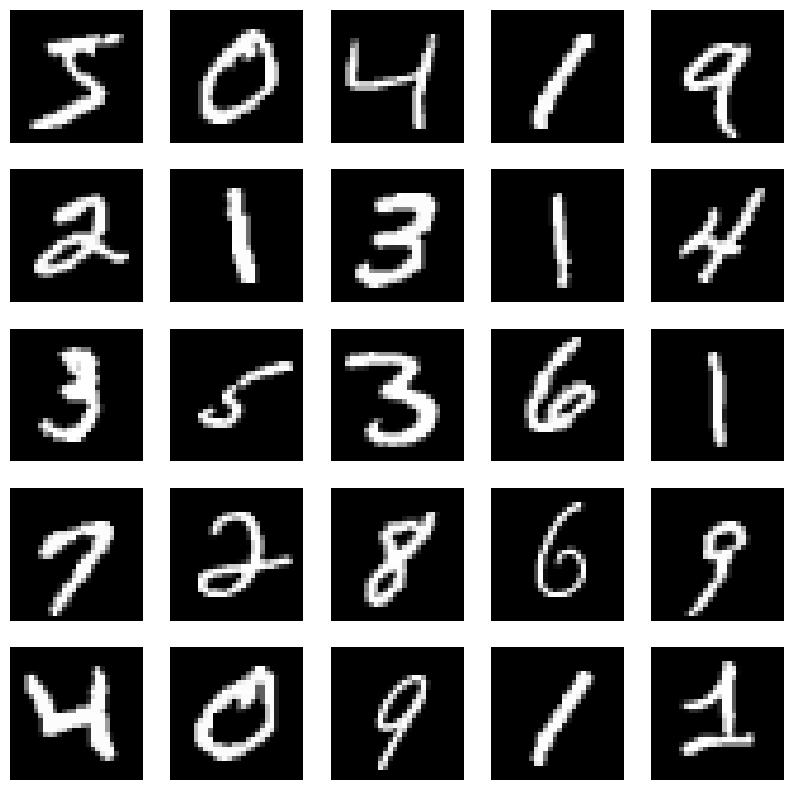

In [13]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test=x_test.reshape(-1,28,28,1).astype('float32')/255.0
model=Sequential(
    [
        layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128,activation='softmax'),
    ]
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9412 - loss: 0.1970 - val_accuracy: 0.9792 - val_loss: 0.0669
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 0.9819 - val_loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9866 - loss: 0.0435 - val_accuracy: 0.9870 - val_loss: 0.0391
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9885 - val_loss: 0.0364
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9916 - loss: 0.0249 - val_accuracy: 0.9903 - val_loss: 0.0289
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9941 - loss: 0.0193 - val_accuracy: 0.9890 - val_loss: 0.0327
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9888 - val_loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9962 - 

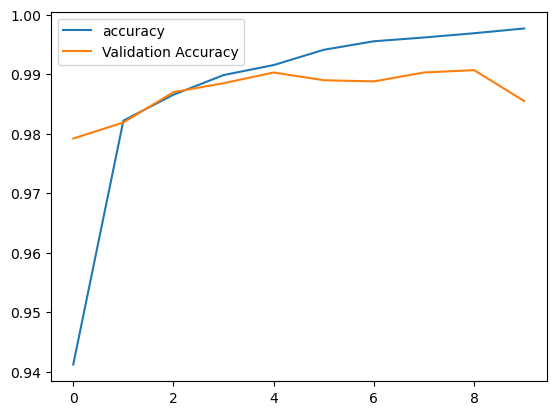

In [7]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [10]:
def predict_image(image_path):
    img=Image.open(image_path).resize((28,28)).convert('L')
    img_array=np.array(img)
    plt.imshow(img_array)
    plt.show()
    res=model.predict(img_array.reshape(1,28,28,1)/255.0)[0]
    print(np.argmax(res))

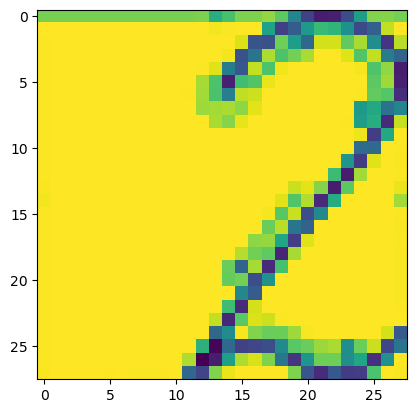

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2


In [11]:
predict_image("two.png")